In [2]:
# Import relevant packages
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats
import statistics as stat
from sklearn.decomposition import PCA
%matplotlib inline

In [3]:
# Load data
pd.set_option('display.max_columns', None)
df = pd.read_csv('medical_clean.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

# Analysis (Part B)

In [5]:
# Put ReAdmis yes/no in separate dataframes
readmitted_df = df[df.ReAdmis == 'Yes']
not_readmitted_df = df[df.ReAdmis == 'No']

In [6]:
t, p = stats.ttest_ind(readmitted_df.Age, not_readmitted_df.Age)
print(f't-statistic: {t}')
print(f'p-value: {p}')

t-statistic: 1.5810818576156604
p-value: 0.11389095473187195


/Users/troybeall/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/troybeall/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


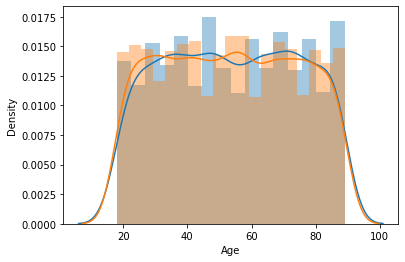

In [7]:
sb.distplot(readmitted_df.Age, label='Readmitted')
sb.distplot(not_readmitted_df.Age, label="Not Readmitted");

# Part C

## Continious Variables: Univariate

In [8]:
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.097200,53.511700,40490.495160,17.964262,5.012200,1.001400,0.398900,34.455299,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.163659,20.638538,28521.153293,2.017231,1.045734,1.008117,0.628505,26.309341,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,610.000000,17.967190,-174.209700,0.000000,0.000000,18.000000,154.080000,9.806483,1.000000,0.000000,0.000000,1.001981,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,36.000000,19598.775000,16.626439,4.000000,0.000000,0.000000,7.896215,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33768.420000,17.951122,5.000000,1.000000,0.000000,35.836244,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54296.402500,19.347963,6.000000,2.000000,1.000000,61.161020,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.100000,26.394449,9.000000,7.000000,5.000000,71.981490,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [9]:
# Age
df['Age'].describe()

count    10000.000000
mean        53.511700
std         20.638538
min         18.000000
25%         36.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

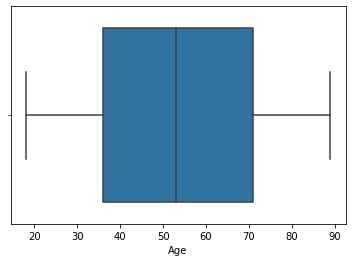

In [10]:
sb.boxplot(data = df, x = 'Age');

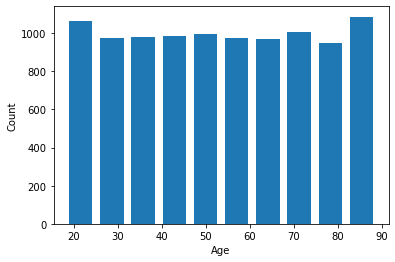

In [11]:
plt.hist(df['Age'], rwidth=0.75)
plt.xlabel('Age')
plt.ylabel('Count');

In [12]:
# Initial Days
df['Initial_days'].describe()

count    10000.000000
mean        34.455299
std         26.309341
min          1.001981
25%          7.896215
50%         35.836244
75%         61.161020
max         71.981490
Name: Initial_days, dtype: float64

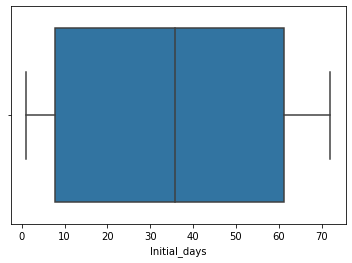

In [13]:
sb.boxplot(data = df, x = 'Initial_days');

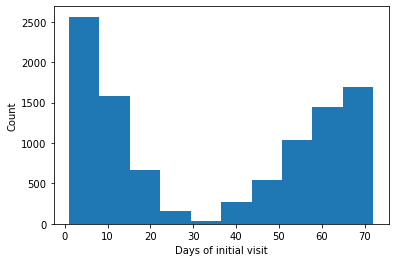

In [14]:
plt.hist(df['Initial_days'])
plt.xlabel('Days of initial visit')
plt.ylabel('Count');

## Categorical Variables: Univariate

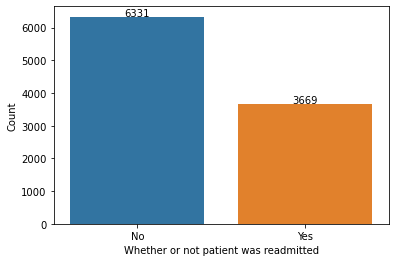

In [15]:
fig, ax1 = plt.subplots()
graph = sb.countplot(ax=ax1,x='ReAdmis', data=df)
graph.set(xlabel="Whether or not patient was readmitted", ylabel = "Count")
i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 15,
        df['ReAdmis'].value_counts()[i],ha="center")
    i += 1

In [16]:
df['ReAdmis'].value_counts()

No     6331
Yes    3669
Name: ReAdmis, dtype: int64

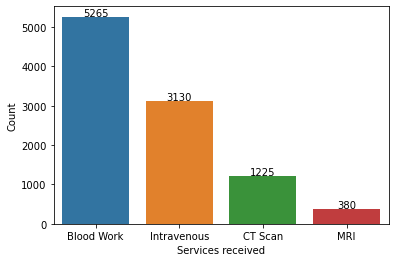

In [17]:
fig, ax1 = plt.subplots()
graph = sb.countplot(ax=ax1,x='Services', data=df)
graph.set(xlabel="Services received", ylabel = "Count")
i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 15,
        df['Services'].value_counts()[i],ha="center")
    i += 1

In [18]:
df['Services'].value_counts()

Blood Work     5265
Intravenous    3130
CT Scan        1225
MRI             380
Name: Services, dtype: int64

# Part D

## Continious Variables: Bivariate

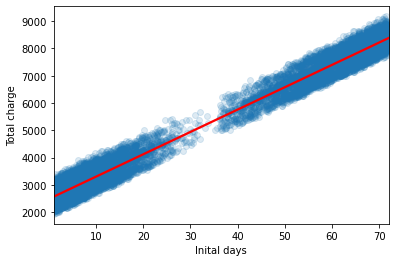

In [19]:
g = sb.regplot(x='Initial_days', y='TotalCharge', 
               lowess=True, data=df, scatter_kws={'alpha':0.15}, line_kws={'color': 'red'})
g.set(xlabel="Inital days", ylabel = "Total charge");

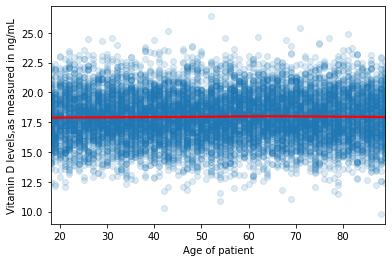

In [181]:
g = sb.regplot(x='Age', y='VitD_levels', 
               lowess=True, data=df, scatter_kws={'alpha':0.15}, line_kws={'color': 'red'})
g.set(xlabel="Age of patient", ylabel = "Vitamin D levels,as measured in ng/mL");

## Categorical Variables: Bivariate

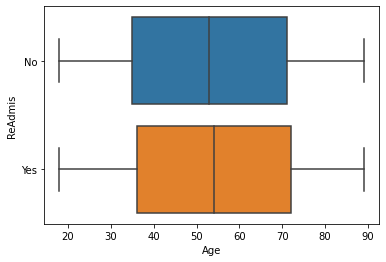

In [182]:
sb.boxplot(data = df, x = 'Age', y = 'ReAdmis');

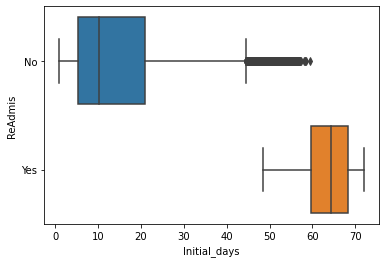

In [184]:
sb.boxplot(data = df, x = 'Initial_days', y = 'ReAdmis');

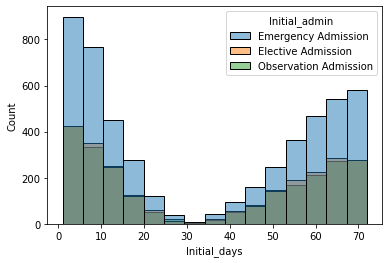

In [21]:
sb.histplot(data = df, x='Initial_days', hue = 'Initial_admin');

## Categorical Variables: Bivariate

No handles with labels found to put in legend.


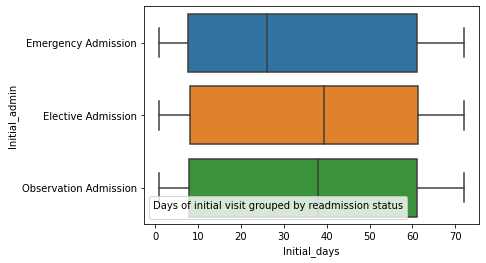

In [22]:
sb.boxplot(data = df, x = 'Initial_days', y = 'Initial_admin')
plt.legend(loc = 3, title='Days of initial visit grouped by readmission status');

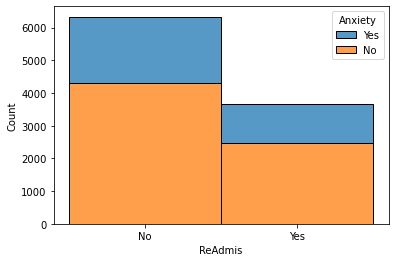

In [187]:
sb.histplot(data=df, x="ReAdmis", hue="Anxiety", stat="count", multiple="stack");

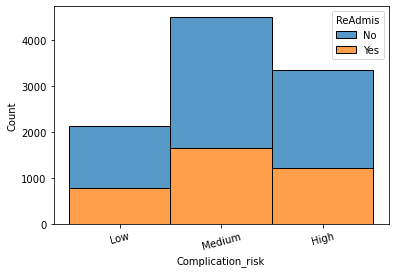

In [188]:
df['Complication_risk'] = pd.Categorical(df['Complication_risk'], ['Low','Medium','High'])
sb.histplot(data=df, x="Complication_risk", hue="ReAdmis", stat="count", multiple="stack")
plt.xticks(rotation = 15);

In [189]:
print(readmitted_df.Complication_risk.value_counts())
print(not_readmitted_df.Complication_risk.value_counts())

Medium    1664
High      1223
Low        782
Name: Complication_risk, dtype: int64
Medium    2853
High      2135
Low       1343
Name: Complication_risk, dtype: int64
